In [1]:
import numpy as np
import pandas as pd
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
afinn=pd.read_csv("Downloads\\Afinn.csv",sep=",",encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [3]:
afinn.shape

(2477, 2)

In [4]:
afinn.head(20)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [7]:
reviews=pd.read_csv("C:\\Users\\NITESH\\Documents\\amazonreview_1.txt",error_bad_lines=False)
reviews.head(100)

,x
0,"0,40,General,Bottoms,Jeans,1028,Amazing fit an..."
1,"1,62,General Petite,Tops,Blouses,850,Lovely an..."
2,"2,47,General Petite,Bottoms,Skirts,993,Meh,""I ..."
3,"3,45,General Petite,Bottoms,Pants,1068,Wow,""Lo..."
4,"4,37,Initmates,Intimate,Swim,24,Great for bigg..."
...,...
95,the blue is gorgeous!
96,the unique style of the peplm and the details ...
97,"runs a little shorter, but i feel the length e..."
98,love !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


In [8]:
reviews=[x.strip() for x in reviews.x]
reviews=[x for x in reviews if x]
reviews[0:10]

['0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,"Like other reviewers i was hesitant to spend this much on a pair of jeans. however, i purchased them at  20% off on retailer day and...honestly...they look so good i probably would have paid full price. these jeans are fresh!",0,5,1',
 '1,62,General Petite,Tops,Blouses,850,Lovely and unique!,"As is true of a bunch of the fall clothing photos, the colors are totally washed out in these model images which is such a shame. the embroidery is bright and vivid and totally unique on this! the bib area is actually a soft corduroy which i think is nice to transition into fall and winter. in terms of fit, i do feel like this is maybe geared more towards the slender build - it is a slim cut which i found really flattering for me since i sometimes swim in tunics. at 5\'7"", 128# with a very small",12,5,1',
 '2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the design! but, it\'s way, way too long... i am 5, 5, 

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NITESH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
from nltk import tokenize
sentences=tokenize.sent_tokenize("".join(reviews))
sentences[0:10]

['0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,"Like other reviewers i was hesitant to spend this much on a pair of jeans.',
 'however, i purchased them at  20% off on retailer day and...honestly...they look so good i probably would have paid full price.',
 'these jeans are fresh!',
 '",0,5,11,62,General Petite,Tops,Blouses,850,Lovely and unique!,"As is true of a bunch of the fall clothing photos, the colors are totally washed out in these model images which is such a shame.',
 'the embroidery is bright and vivid and totally unique on this!',
 'the bib area is actually a soft corduroy which i think is nice to transition into fall and winter.',
 'in terms of fit, i do feel like this is maybe geared more towards the slender build - it is a slim cut which i found really flattering for me since i sometimes swim in tunics.',
 'at 5\'7"", 128# with a very small",12,5,12,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the design!',
 "but, it's way, way t

In [13]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df1=sent_df.head(2000)
sent_df1

,sentence
0,"0,40,General,Bottoms,Jeans,1028,Amazing fit an..."
1,"however, i purchased them at 20% off on retai..."
2,these jeans are fresh!
3,""",0,5,11,62,General Petite,Tops,Blouses,850,Lo..."
4,the embroidery is bright and vivid and totally...
...,...
1995,the color is a little more saturated in person...
1996,""",2,5,1495,31,General,Dresses,Dresses,1082,Run..."
1997,i am 32c and the top was too big.
1998,fit perfectly on hips.


In [14]:
affinity_scores=afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [15]:
nlp=spacy.load('en_core_web_md')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [16]:
calculate_sentiment(text='bad lier')

-3

In [17]:
sent_df1['sentiment_value']=sent_df1['sentence'].apply(calculate_sentiment)

C:\Users\NITESH\AppData\Local\Temp/ipykernel_4064/2007854672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df1['sentiment_value']=sent_df1['sentence'].apply(calculate_sentiment)


In [18]:
sent_df1

,sentence,sentiment_value
0,"0,40,General,Bottoms,Jeans,1028,Amazing fit an...",-1
1,"however, i purchased them at 20% off on retai...",2
2,these jeans are fresh!,1
3,""",0,5,11,62,General Petite,Tops,Blouses,850,Lo...",-2
4,the embroidery is bright and vivid and totally...,1
...,...,...
1995,the color is a little more saturated in person...,-2
1996,""",2,5,1495,31,General,Dresses,Dresses,1082,Run...",6
1997,i am 32c and the top was too big.,3
1998,fit perfectly on hips.,4


In [20]:
sent_df1[sent_df1.sentiment_value<-5]

,sentence,sentiment_value


In [21]:
sent_df1[sent_df1.sentiment_value>10]

,sentence,sentiment_value
74,""",13,4,118,50,General Petite,Bottoms,Pants,106...",16
83,amazing quality and well worth the price.fyi- ...,12
111,"as to the sizing, i usually wear a size 8, but...",11
255,i am both surprised and excited that it fits.i...,12
732,"it's a little too nice for me to wear to work,...",12
798,"also have not washed them, so i hope the color...",11
928,well this top fits that perfectly and i'm exci...,12
929,plus i was equally excited when i could pair t...,13
997,i sized down for one pair for a more fitted lo...,12
1058,hugs in all the right places and a nice substa...,15


In [22]:
sent_df1['word_count']=sent_df1['sentence'].str.split().apply(len)
sent_df1.head(10)

C:\Users\NITESH\AppData\Local\Temp/ipykernel_4064/2991927115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df1['word_count']=sent_df1['sentence'].str.split().apply(len)


,sentence,sentiment_value,word_count
0,"0,40,General,Bottoms,Jeans,1028,Amazing fit an...",-1,18
1,"however, i purchased them at 20% off on retai...",2,21
2,these jeans are fresh!,1,4
3,""",0,5,11,62,General Petite,Tops,Blouses,850,Lo...",-2,29
4,the embroidery is bright and vivid and totally...,1,11
5,the bib area is actually a soft corduroy which...,3,19
6,"in terms of fit, i do feel like this is maybe ...",2,36
7,"at 5'7"""", 128# with a very small"",12,5,12,47,G...",4,17
8,"but, it's way, way too long... i am 5, 5, 116l...",0,20
9,i step on the skirt as i walk.,0,8


In [23]:
sent_df1['sentiment_value'].describe()

count    2000.00000
mean        1.93800
std         2.61717
min        -5.00000
25%         0.00000
50%         2.00000
75%         3.00000
max        16.00000
Name: sentiment_value, dtype: float64

In [24]:
sent_df1[sent_df1['sentiment_value']<-5]

,sentence,sentiment_value,word_count


In [26]:
sent_df1[sent_df1['sentiment_value']<5].head()['sentence'].tolist()[1]

'however, i purchased them at  20% off on retailer day and...honestly...they look so good i probably would have paid full price.'

In [27]:
sent_df1['index']=range(0,len(sent_df1))
sent_df1

C:\Users\NITESH\AppData\Local\Temp/ipykernel_4064/707744483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df1['index']=range(0,len(sent_df1))


,sentence,sentiment_value,word_count,index
0,"0,40,General,Bottoms,Jeans,1028,Amazing fit an...",-1,18,0
1,"however, i purchased them at 20% off on retai...",2,21,1
2,these jeans are fresh!,1,4,2
3,""",0,5,11,62,General Petite,Tops,Blouses,850,Lo...",-2,29,3
4,the embroidery is bright and vivid and totally...,1,11,4
...,...,...,...,...
1995,the color is a little more saturated in person...,-2,17,1995
1996,""",2,5,1495,31,General,Dresses,Dresses,1082,Run...",6,22,1996
1997,i am 32c and the top was too big.,3,9,1997
1998,fit perfectly on hips.,4,4,1998


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

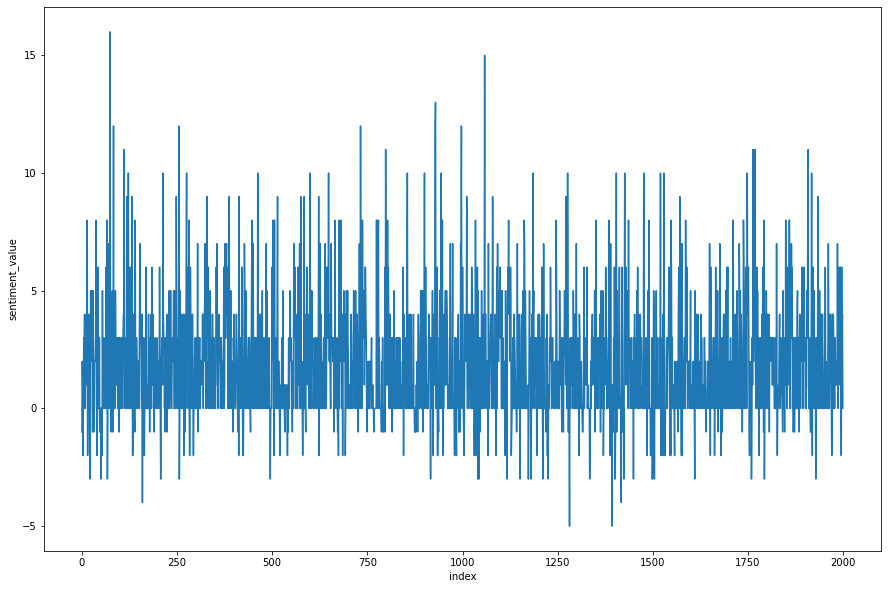

In [30]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df1)

<AxesSubplot:title={'center':'Sentence sentimental value to Sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

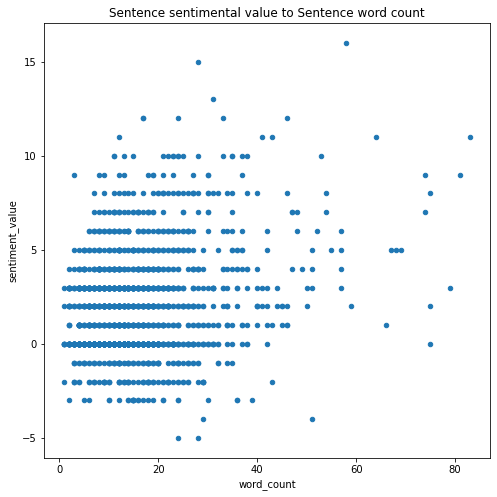

In [31]:
sent_df1.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentimental value to Sentence word count')